# HR Analytics - Data Gathering + PreProcessing

Objective: Create a logistic Reg Model to predict the attrition of employees by using the features available from the datasets given

Created By: Stephen Cole

Creation Date: 13/07/2022

##### Last Updated

In [1]:
from datetime import datetime, timedelta

input("Last Updated By: ")
print(f"Last Updated: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")

Last Updated By: Stephen Cole
Last Updated: 12/08/2022 17:38:04


### Import Packages

In [2]:
# Importing all packages in one cell helps to keep the notebook clean and readable as having multiple imports scattered makes
# it hard to keep track of all the packages being used

import os
import time
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option("display.max_columns", None, "display.max_rows", 500)

### Define Custom Functions

This is where I normally store any functions I use to keep notebooks clean

In [5]:
def find_column_type(df):
    """
    This function identify categorical, boolean and numerical values.
    
    Parameters
    ---------
    df : DataFrame
        Usually a DataFrame with training samples that will be used to fit a model.
    
    Returns
    -------
    categorical_cols : list
        Categorical features.
    bool_cols:
        Boolean features.
    numerical_cols:
        Numerical features.
    """
    
    all_cols=list(df.columns)
    numerical_cols_temp = df._get_numeric_data().columns
    categorical_cols = list(set(all_cols) - set(numerical_cols_temp))
    bool_cols = [col for col in all_cols if np.isin(df[col].dropna().unique(), [0, 1,0.0,1.0]).all()]
    numerical_cols = list(set(numerical_cols_temp) - set(bool_cols))
    
    return categorical_cols,bool_cols,numerical_cols


def num_to_bool(column):
    """
    This function converts numeric column to boolean flag
    
    Parameters
    -----
    column : pandas Series
        DataFrame column for converting
    
    Returns 
    -----
    convert_column : pandas Series
        Boolean flag column 
    """
    
    change_vals = list(column.unique())
    change_vals.remove(0)
    change_vals.remove(1)

    return column.replace(to_replace=change_vals, value=1)

def save_obj(obj, name, file_path):
    """
    This function saves any object as a .pkl file so that it can be easily read in other notebooks
    
    Parameters
    -----
    obj : Object's variable name 
        The object that needs to be saved.
    name : String
        The name that you would like to save the object as.
    file_path: String
        Directory in which you are saving the object to.
    
    Returns
    -----
        A saved .pkl file in dir and name specified
    """
    file_path = os.path.join(file_path,name)
    with open(file_path + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Data Gathering

Able to calculate the average amount of hours each Employee works from the ```in_time.csv``` & the ```out_time.csv``` datasets

In [6]:
data_dict = pd.read_excel('data_dictionary.xlsx')

In [7]:
data_dict

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [8]:
# Use the Data Dictionary given to get a full understanding of the data within these csvs
# There is no dictionary for in_time and out_time

start_time = time.time()
print('start_time', time.asctime( time.localtime(time.time()) ))

manager_survey_data = pd.read_csv('manager_survey_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
general_data = pd.read_csv('general_data.csv')
in_time = pd.read_csv("in_time.csv")
out_time = pd.read_csv("out_time.csv")

end_time = time.time()
total_time = end_time - start_time
print('total_time to read data', str(timedelta(seconds=total_time)))

start_time Tue Jul 19 11:49:08 2022
total_time to read data 0:00:01.108971


In [9]:
manager_survey_data.head(3), employee_survey_data.head(3)

(   EmployeeID  JobInvolvement  PerformanceRating
 0           1               3                  3
 1           2               2                  4
 2           3               3                  3,
    EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
 0           1                      3.0              4.0              2.0
 1           2                      3.0              2.0              4.0
 2           3                      2.0              2.0              1.0)

In [10]:
general_data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3


In [11]:
in_time.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [12]:
out_time.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

general_data contains our target Attrition, can use EmployeeID to join all tables together

Note: This should have been done in SQL if possible (except for in_time and out_time)

In [13]:
# No Nulls within manager_survey_data

manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [14]:
# Handful of nulls with non primary key

employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [15]:
# Only some nulls within NumCompaniesWorked and TotalWorkingYears
# This may be due to them leaving and so they withdrew this information due to GDPR

general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [16]:
general_data.loc[general_data['NumCompaniesWorked'].isna(), 'Attrition']

115      No
210      No
343      No
476      No
647      No
799     Yes
932      No
1103     No
1312    Yes
1521     No
1711     No
1996     No
2365    Yes
2696    Yes
3063     No
3533     No
3910     No
4226     No
4395     No
Name: Attrition, dtype: object

In [17]:
general_data.loc[general_data['NumCompaniesWorked'].isna(), :]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,1,Sales Executive,Divorced,23670,NaN,Y,12,8,1,5.0,2,5,0,4
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,1,Laboratory Technician,Divorced,99800,NaN,Y,11,8,1,18.0,2,10,6,9
343,40,No,Travel_Frequently,Sales,9,3,Marketing,1,344,Male,3,Manufacturing Director,Single,22380,NaN,Y,14,8,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,1,477,Male,2,Sales Representative,Married,49070,NaN,Y,21,8,1,4.0,2,4,1,1
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,1,648,Female,2,Healthcare Representative,Divorced,48050,NaN,Y,16,8,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,1,800,Female,5,Research Scientist,Single,44340,NaN,Y,17,8,3,7.0,1,5,0,0
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,1,933,Male,5,Research Scientist,Divorced,50030,NaN,Y,13,8,0,10.0,5,9,1,6
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1,1104,Male,2,Healthcare Representative,Married,83800,NaN,Y,14,8,0,8.0,3,7,7,7
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1,1313,Male,2,Healthcare Representative,Divorced,54840,NaN,Y,17,8,0,7.0,4,3,0,2
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1,1522,Female,3,Research Scientist,Married,99070,NaN,Y,13,8,1,6.0,3,5,0,3


Majority are within R&D so worth asking them as to why there are nulls as there may be a fault in their system

In [18]:
general_data.loc[general_data['TotalWorkingYears'].isna(), 'Attrition']

23       No
137      No
308     Yes
574      No
1517     No
2367     No
3120     No
3818    Yes
4409     No
Name: Attrition, dtype: object

In [19]:
general_data.loc[general_data['TotalWorkingYears'].isna(), :]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,1,Manufacturing Director,Married,89260,1.0,Y,14,8,0,NaN,4,20,11,6
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,138,Female,1,Manufacturing Director,Married,37480,7.0,Y,14,8,2,NaN,3,3,1,2
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,309,Male,1,Research Director,Single,27740,4.0,Y,13,8,1,NaN,2,5,1,3
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,1,575,Male,3,Manufacturing Director,Divorced,166590,7.0,Y,16,8,1,NaN,2,6,1,3
1517,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1,1518,Male,1,Sales Executive,Married,85780,7.0,Y,21,8,0,NaN,4,9,0,8
2367,39,No,Travel_Rarely,Sales,2,4,Life Sciences,1,2368,Male,1,Laboratory Technician,Divorced,72640,0.0,Y,17,8,0,NaN,5,10,0,7
3120,35,No,Travel_Rarely,Research & Development,12,2,Medical,1,3121,Female,2,Sales Representative,Married,28090,4.0,Y,23,8,1,NaN,2,8,0,0
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,1,3819,Female,2,Laboratory Technician,Married,24130,1.0,Y,16,8,1,NaN,2,1,0,0
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,NaN,6,21,3,9


Same again for TotalWorkingYears

In [20]:
general_data.Department.value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

This may be due to the volume from R&D though and so doesn't give much explanation

Inconclusive as to why it is. This would need investigating as to why it is in actual client work and you would need a reason for why only a handful are nulls, if there is no explanation in the data. This would allow you to imputate the nulls as accurately as possible to reflect live data.

### Joining all the tables together

note: exclude times as TimeDates cannot be used in modelling - only numerical data can be used

In [21]:
# Use general_data as 
df = pd.merge(general_data, employee_survey_data, how='left', on='EmployeeID')
df = pd.merge(df, manager_survey_data, how='left', on='EmployeeID')

In [22]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [23]:
df['Attrition'].dropna().unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df.Attrition.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Distribution of Attrition')

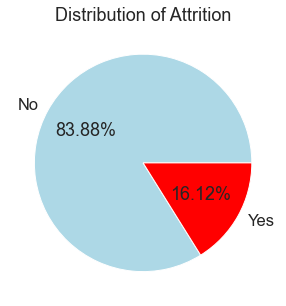

In [25]:
plt.figure(figsize=(10, 5))
sns.set(font_scale = 1.5, style = 'whitegrid')
#define data

data_points = df.Attrition.value_counts().values
labels = df.Attrition.value_counts().index.to_list()

#create pie chart
plt.pie(data_points, labels = labels, colors = ['lightblue','red'], autopct='%.2f%%')
plt.title('Distribution of Attrition')

In [26]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

### Convert to Correct Data Types

Will need to change Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, and WorkLifeBalance to categoricals as the data set is in Ordinal format. However, RelationshipSatisfaction does not exist in our dataset.

- Why is this the case? Ask the stakeholder during client placement

In [27]:
# Convert Ordinal cols to categoricals which mean more to the client, using the data dictionary

df['Education'] = df['Education'].replace({ 1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'})
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({ 1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
df['JobInvolvement'] = df['JobInvolvement'].replace({ 1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
df['JobSatisfaction'] = df['JobSatisfaction'].replace({ 1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
df['PerformanceRating'] = df['PerformanceRating'].replace({ 1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({ 1:'Bad', 2:'Good', 3:'Better', 4:'Best'})

In [28]:
df.Attrition = df.Attrition.replace({'Yes':1,'No':0})
df.Over18 = df.Over18.replace({'Y':1, 'N':0})

In [29]:
df.columns = df.columns.str.lower()

In [30]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeecount', 'employeeid', 'gender',
       'joblevel', 'jobrole', 'maritalstatus', 'monthlyincome',
       'numcompaniesworked', 'over18', 'percentsalaryhike', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'environmentsatisfaction', 'jobsatisfaction', 'worklifebalance',
       'jobinvolvement', 'performancerating'],
      dtype='object')

In [31]:
cat_cols, bool_cols, num_cols = find_column_type(df)

In [32]:
cat_cols

['jobsatisfaction',
 'jobinvolvement',
 'maritalstatus',
 'environmentsatisfaction',
 'department',
 'performancerating',
 'gender',
 'education',
 'educationfield',
 'businesstravel',
 'worklifebalance',
 'jobrole']

In [33]:
bool_cols

['attrition', 'employeecount', 'over18']

In [34]:
num_cols

['age',
 'joblevel',
 'stockoptionlevel',
 'yearsatcompany',
 'monthlyincome',
 'numcompaniesworked',
 'employeeid',
 'standardhours',
 'yearswithcurrmanager',
 'trainingtimeslastyear',
 'percentsalaryhike',
 'yearssincelastpromotion',
 'totalworkingyears',
 'distancefromhome']

##### Categoricals

In [35]:
#find unique values in categorical variables
for col in cat_cols:
    print("{col}:{value}".format(col=col, value=pd.value_counts(df[col],dropna=False)))

    print("----------------------------------------------------------------")

jobsatisfaction:Very High    1367
High         1323
Low           860
Medium        840
NaN            20
Name: jobsatisfaction, dtype: int64
----------------------------------------------------------------
jobinvolvement:High         2604
Medium       1125
Very High     432
Low           249
Name: jobinvolvement, dtype: int64
----------------------------------------------------------------
maritalstatus:Married     2019
Single      1410
Divorced     981
Name: maritalstatus, dtype: int64
----------------------------------------------------------------
environmentsatisfaction:High         1350
Very High    1334
Medium        856
Low           845
NaN            25
Name: environmentsatisfaction, dtype: int64
----------------------------------------------------------------
department:Research & Development    2883
Sales                     1338
Human Resources            189
Name: department, dtype: int64
----------------------------------------------------------------
performancerating:E

Some Nulls in worklifebalance, environmentsatisfaction, and jobsatisfaction - previously discovered above.

<AxesSubplot:xlabel='worklifebalance', ylabel='Count'>

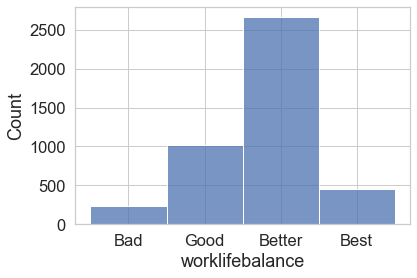

In [36]:
df_wlb = pd.DataFrame({'worklifebalance':pd.Categorical(df['worklifebalance'], ['Bad', 'Good', 'Better', 'Best'])})
sns.histplot(data=df_wlb, x='worklifebalance')

<AxesSubplot:xlabel='environmentsatisfaction', ylabel='Count'>

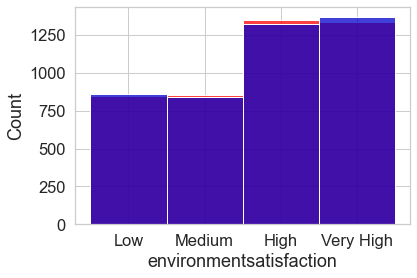

In [37]:
df_es_js = pd.DataFrame({'environmentsatisfaction':pd.Categorical(df['environmentsatisfaction'], ['Low', 'Medium', 'High', 'Very High']),
                        'jobsatisfaction':pd.Categorical(df['jobsatisfaction'], ['Low', 'Medium', 'High', 'Very High'])})

sns.histplot(data=df_es_js, x='environmentsatisfaction', color='red')
sns.histplot(data=df_es_js, x='jobsatisfaction', color='mediumblue')

```environmentsatisfaction``` and ```jobsatisfaction``` have very similar distributions and have barely any nulls. Therefore, safe to impute with the modes (most common category).

In [38]:
check_col = ['worklifebalance', 'environmentsatisfaction','jobsatisfaction']
imputation_cat_dict = dict(zip(check_col, df[check_col].mode().values[0,:].tolist()))

In [39]:
imputation_cat_dict

{'worklifebalance': 'Better',
 'environmentsatisfaction': 'High',
 'jobsatisfaction': 'Very High'}

In [40]:
# Changing null values for numeric variables 

for col, item in imputation_cat_dict.items():
    df[col] = df[col].fillna(item)

##### Boolean Columns

In [41]:
#find unique values in categorical variables
for col in bool_cols:
    print("{col}:{value}".format(col=col, value=pd.value_counts(df[col],dropna=False)))

    print("----------------------------------------------------------------")

attrition:0    3699
1     711
Name: attrition, dtype: int64
----------------------------------------------------------------
employeecount:1    4410
Name: employeecount, dtype: int64
----------------------------------------------------------------
over18:1    4410
Name: over18, dtype: int64
----------------------------------------------------------------


In [42]:
# employeecount and over18 are only positives and do not contain anything useful for our models
# No nulls either so no imputation needed.

df.drop(['employeecount','over18'], axis=1, inplace=True)

##### Numerical Columns

In [43]:
# Checking for null values in customer feature numeric features
check_col = []
print('Nulls in each numeric column')
for column in num_cols:

    total_nulls = df[column].isna().sum() + len(df[df[column]=='?'].index)
    if total_nulls != 0:
        print('----- ', column, ':', total_nulls, '/', df.shape[0]) 
        check_col.append(column)

Nulls in each numeric column
-----  numcompaniesworked : 19 / 4410
-----  totalworkingyears : 9 / 4410


In [44]:
check_col

['numcompaniesworked', 'totalworkingyears']

In [45]:
# Percentage of Nulls

for col in check_col:
    null = df[col].isna().sum()/df.shape[0]
    print("{} ------- {:.3f}%".format(col, null))


numcompaniesworked ------- 0.004%
totalworkingyears ------- 0.002%


<Figure size 432x288 with 0 Axes>

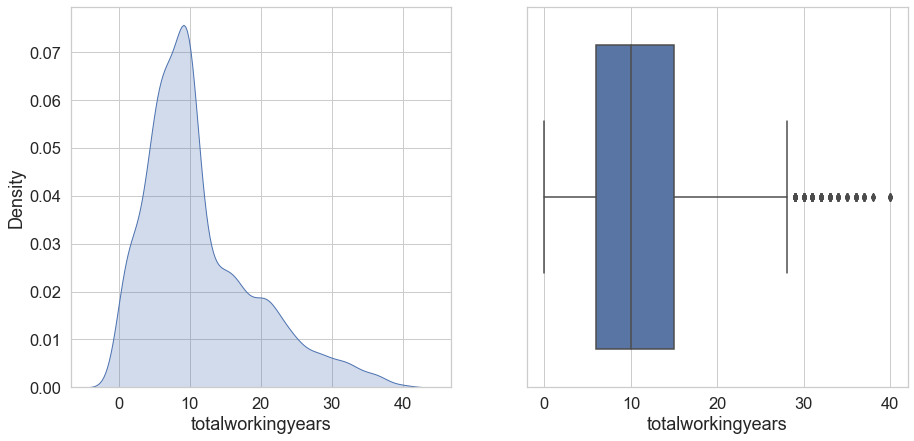

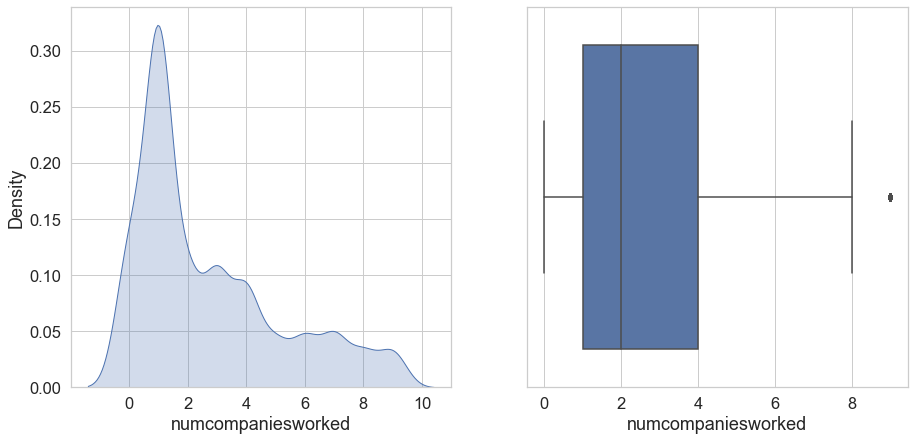

In [46]:
for i, col in enumerate(check_col):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    plt.figure(i)
    sns.kdeplot(x=df[col], color='b', shade=True, ax=ax[0])
    sns.boxplot(x=df[col], orient='v', ax=ax[1])

In [47]:
imputation_num_dict = dict(zip(check_col, df[check_col].median().values.tolist()))

In [48]:
imputation_num_dict

{'numcompaniesworked': 2.0, 'totalworkingyears': 10.0}

In [49]:
# Changing null values for numeric variables 

for col, item in imputation_num_dict.items():
    df[col] = df[col].fillna(item)

In [50]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4410 non-null   int64  
 1   attrition                4410 non-null   int64  
 2   businesstravel           4410 non-null   object 
 3   department               4410 non-null   object 
 4   distancefromhome         4410 non-null   int64  
 5   education                4410 non-null   object 
 6   educationfield           4410 non-null   object 
 7   employeeid               4410 non-null   int64  
 8   gender                   4410 non-null   object 
 9   joblevel                 4410 non-null   int64  
 10  jobrole                  4410 non-null   object 
 11  maritalstatus            4410 non-null   object 
 12  monthlyincome            4410 non-null   int64  
 13  numcompaniesworked       4410 non-null   float64
 14  percentsalaryhike       

In [51]:
sum(df.isna().sum()/df.shape[0])

0.0

### Bonus: Creating a new feature from time csvs

In [52]:
in_time.columns = in_time.columns.str.replace("Unnamed: 0", "EmployeeID")
out_time.columns = out_time.columns.str.replace("Unnamed: 0", "EmployeeID")

In [53]:
in_time.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 262 columns):
 #    Column      Dtype  
---   ------      -----  
 0    EmployeeID  int64  
 1    2015-01-01  float64
 2    2015-01-02  object 
 3    2015-01-05  object 
 4    2015-01-06  object 
 5    2015-01-07  object 
 6    2015-01-08  object 
 7    2015-01-09  object 
 8    2015-01-12  object 
 9    2015-01-13  object 
 10   2015-01-14  float64
 11   2015-01-15  object 
 12   2015-01-16  object 
 13   2015-01-19  object 
 14   2015-01-20  object 
 15   2015-01-21  object 
 16   2015-01-22  object 
 17   2015-01-23  object 
 18   2015-01-26  float64
 19   2015-01-27  object 
 20   2015-01-28  object 
 21   2015-01-29  object 
 22   2015-01-30  object 
 23   2015-02-02  object 
 24   2015-02-03  object 
 25   2015-02-04  object 
 26   2015-02-05  object 
 27   2015-02-06  object 
 28   2015-02-09  object 
 29   2015-02-10  object 
 30   2015-02-11  object 
 31   2015-02-12  object 
 32   20

In [54]:
in_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [55]:
out_time.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 262 columns):
 #    Column      Dtype  
---   ------      -----  
 0    EmployeeID  int64  
 1    2015-01-01  float64
 2    2015-01-02  object 
 3    2015-01-05  object 
 4    2015-01-06  object 
 5    2015-01-07  object 
 6    2015-01-08  object 
 7    2015-01-09  object 
 8    2015-01-12  object 
 9    2015-01-13  object 
 10   2015-01-14  float64
 11   2015-01-15  object 
 12   2015-01-16  object 
 13   2015-01-19  object 
 14   2015-01-20  object 
 15   2015-01-21  object 
 16   2015-01-22  object 
 17   2015-01-23  object 
 18   2015-01-26  float64
 19   2015-01-27  object 
 20   2015-01-28  object 
 21   2015-01-29  object 
 22   2015-01-30  object 
 23   2015-02-02  object 
 24   2015-02-03  object 
 25   2015-02-04  object 
 26   2015-02-05  object 
 27   2015-02-06  object 
 28   2015-02-09  object 
 29   2015-02-10  object 
 30   2015-02-11  object 
 31   2015-02-12  object 
 32   20

In [56]:
out_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [57]:
in_time=in_time.replace(np.nan,0)
out_time=out_time.replace(np.nan,0)

In [58]:
in_time.iloc[:,1:] = in_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')
out_time.iloc[:,1:] = out_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')

In [59]:
print(f"in_time shape: {in_time.shape}", f"out_time shape: {out_time.shape}", sep='\n')

in_time shape: (4410, 262)
out_time shape: (4410, 262)


In [60]:
times = pd.concat([in_time,out_time], axis=0)

In [61]:
print(f"concat shape: {times.shape}")

concat shape: (8820, 262)


In [62]:
# Delete DataFrames to save memory
del in_time
del out_time

In [63]:
# Set ID to index to exclude from difference calculation
times = times.set_index('EmployeeID')

In [64]:
times.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,1970-01-01,2015-01-15 10:01:24,2015-01-16 10:19:08,1970-01-01 00:00:00,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,1970-01-01,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,1970-01-01 00:00:00,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2

In [65]:
# Calc difference between the in and out times and only include the difference rows
# If unsure as to how DataFrame.diff works then please see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html 
times = times.diff(periods=4410)
times = times.iloc[4410:]

In [66]:
times.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:

In [67]:
cols2drop = []
for col in times.columns:
    if len(times[col].unique()) != 1:
        pass
    else:
        cols2drop.append(col)

In [68]:
# Columns which were nulls and therefore provide no useful information
cols2drop

['2015-01-01',
 '2015-01-14',
 '2015-01-26',
 '2015-03-05',
 '2015-05-01',
 '2015-07-17',
 '2015-09-17',
 '2015-10-02',
 '2015-11-09',
 '2015-11-10',
 '2015-11-11',
 '2015-12-25']

In [69]:
times.drop(cols2drop, axis=1, inplace=True)

In [70]:
times['Actual Time']=times.mean(axis=1)
times['Actual Time'].head()

EmployeeID
1   0 days 06:52:12.823293172
2   0 days 07:18:57.493975903
3   0 days 06:48:57.891566265
4   0 days 06:47:21.172690763
5   0 days 07:52:39.220883534
Name: Actual Time, dtype: timedelta64[ns]

In [71]:
times['hrs']=times['Actual Time']/np.timedelta64(1, 'h')
times['hrs'].head()

EmployeeID
1    6.870229
2    7.315971
3    6.816081
4    6.789215
5    7.877561
Name: hrs, dtype: float64

In [72]:
# Pop out index so that it can be joined by EmployeeID
times.reset_index(inplace=True)
times.head()

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Actual Time,hrs
0,1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:

In [73]:
# columns.difference will return a new index with elements not included in the list
# We drop these as we can only use the feature that we created in our modelling

times.drop(times.columns.difference(['EmployeeID','hrs']), axis=1, inplace=True)

In [74]:
times.columns = times.columns.str.lower()

In [75]:
times.head()

,employeeid,hrs
0,1,6.870229
1,2,7.315971
2,3,6.816081
3,4,6.789215
4,5,7.877561


In [76]:
df = pd.merge(df,times,how='left',on='employeeid')

In [77]:
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating,hrs
0,51,0,Travel_Rarely,Sales,6,College,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,8,0,1.0,6,1,0,0,High,Very High,Good,High,Excellent,6.870229
1,31,1,Travel_Frequently,Research & Development,10,Below College,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,8,1,6.0,3,5,1,4,High,Medium,Best,Medium,Outstanding,7.315971
2,32,0,Travel_Frequently,Research & Development,17,Master,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,Medium,Medium,Bad,High,Excellent,6.816081
3,38,0,Non-Travel,Research & Development,2,Doctor,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,8,3,13.0,5,8,7,5,Very High,Very High,Better,Medium,Excellent,6.789215
4,32,0,Travel_Rarely,Research & Development,10,Below College,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,8,2,9.0,2,6,0,4,Very High,Low,Better,High,Excellent,7.877561


In [78]:
df.hrs.isna().sum()

0

In [79]:
X = df.drop('attrition', axis=1)
y = df.attrition

In [80]:
X = pd.get_dummies(X, columns = cat_cols, prefix = cat_cols)

In [81]:
X.shape

(4410, 64)

##### Checking Variance

In [82]:
threshold = 0.05
low_std_cols = df.std()[df.std() < threshold]

High Variance across all features so no need to drop any

In [85]:
save_obj(X, 'Modelling_dset', r'C:\Users\coles2\Documents\Xander\Data_Science_Project_HR_Analytics-main\Datasets')
save_obj(y, 'Target', r'C:\Users\coles2\Documents\Xander\Data_Science_Project_HR_Analytics-main\Datasets')